In [1]:
import benchmark_model as m
import pandas as pd
from sklearn.linear_model import LogisticRegression
file_path = "../../fake_news/combined_data_cleaned_just_prop_2.csv"
# we intend to test each solver independently and then compare them afterwards
df = pd.read_csv(file_path, delimiter="|", header=None).sample(frac=1).sample(frac=1)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  5.0min remaining:   53.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.1min finished


done in 317.909s

scores!
mean: 0.849 std: (+/-0.002) for {'clf__C': 9, 'clf__max_iter': 185, 'clf__solver': 'saga', 'tfidf__norm': 'l2', 'tfidf__smooth_idf': False, 'tfidf__use_idf': True, 'vect__max_df': 0.2, 'vect__max_features': 85000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.850 std: (+/-0.003) for {'clf__C': 9, 'clf__max_iter': 185, 'clf__solver': 'saga', 'tfidf__norm': 'l2', 'tfidf__smooth_idf': False, 'tfidf__use_idf': True, 'vect__max_df': 0.2, 'vect__max_features': 90000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.850 std: (+/-0.003) for {'clf__C': 9, 'clf__max_iter': 185, 'clf__solver': 'saga', 'tfidf__norm': 'l2', 'tfidf__smooth_idf': False, 'tfidf__use_idf': True, 'vect__max_df': 0.3, 'vect__max_features': 85000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.851 std: (+/-0.003) for {'clf__C': 9, 'clf__max_iter': 185, 'clf__solver': 'saga', 'tfidf__norm': 'l2', 'tfidf__smooth_idf': False, 'tfidf__use_idf': True, 've

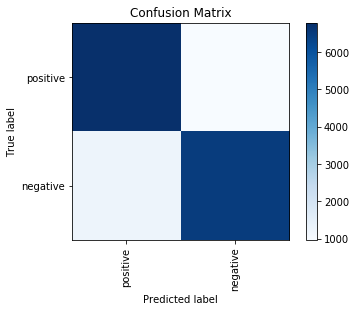

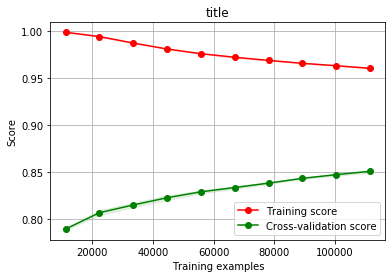

In [2]:
clf = m.Classifier(LogisticRegression(), data = df)
params_trial_1 = { 
            'vect__max_features': [85000,90000],
            'vect__ngram_range': [(1, 2)],
            'tfidf__norm': ['l2'],
            'vect__stop_words' : [None],
            'clf__max_iter': [185], #two extremes
            'clf__solver': ['saga'],
            'vect__max_df':[0.2,0.3],
            'clf__C':[9,9.2],            
            'tfidf__use_idf':[True],
            'tfidf__smooth_idf':[False]
            }
clf.fit(params_trial_1,5)
clf.eval_best_n_params(0.9) #top 30%
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #0.851

Evaluation on test set:

Accuracy Score : 0.8
Precision Score : 0.8
Recall Score : 0.8
F1 Score : 0.8000000000000002
Confusion Matrix


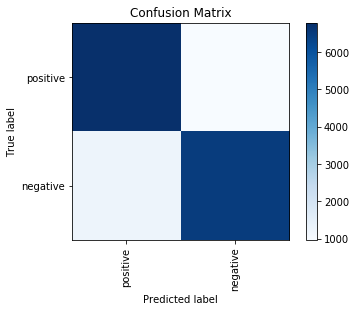

prediction examples:


Test: 'He only won in the eyes of the FAKE NEWS MEDIA. I concede NOTHING! We have a long way to go. This was a RIGGED ELECTION!' --> Prediction: 0 Correct: 0


Test: 'RIGGED ELECTION. WE WILL WIN!' --> Prediction: 0 Correct: 0


Test: 'I've never lost! not once! not twice! never evar LOST' --> Prediction: 1 Correct: 0


Test: 'Rudy has an interview by @Maria 10:pm, NOW!' --> Prediction: 1 Correct: 1


Test: 'I look forward to Mayor Giuliani spearheading the legal effort to defend OUR RIGHT to FREE and FAIR ELECTIONS! Rudy Giuliani, Joseph diGenova, Victoria Toensing, Sidney Powell, and Jenna Ellis, a truly great team, added to our other wonderful lawyers and representatives!' --> Prediction: 1 Correct: 1




array([[0.50428069, 0.49571931],
       [0.9791171 , 0.0208829 ],
       [0.29269195, 0.70730805],
       [0.2247857 , 0.7752143 ],
       [0.31085934, 0.68914066]])

In [4]:
predict_set = (["He only won in the eyes of the FAKE NEWS MEDIA. I concede NOTHING! We have a long way to go. This was a RIGGED ELECTION!",
       'RIGGED ELECTION. WE WILL WIN!',"I've never lost! not once! not twice! never evar LOST",'Rudy has an interview by @Maria 10:pm, NOW!','I look forward to Mayor Giuliani spearheading the legal effort to defend OUR RIGHT to FREE and FAIR ELECTIONS! Rudy Giuliani, Joseph diGenova, Victoria Toensing, Sidney Powell, and Jenna Ellis, a truly great team, added to our other wonderful lawyers and representatives!'],
        [0,0,0,1,1])

res, prob = clf.eval_prediction(predict_set = predict_set)
if predict_set and len(predict_set[0])<25:
  print("prediction examples:\n\n")
  for i in range(len(predict_set[0])):
     print("Test: '"+predict_set[0][i]+"' --> Prediction:", res[i],"Correct:", predict_set[1][i])
     print("\n")

prob
# way to jumpy to call fake news
# it thinks informal language is fake news
# we need messy sounding true statements


Evaluation on test set:

Accuracy Score : 0.8567191127160175
Precision Score : 0.8567191127160175
Recall Score : 0.8567191127160175
F1 Score : 0.8567191127160175
Confusion Matrix


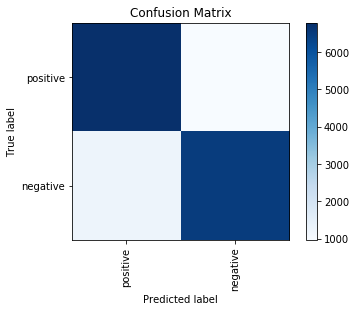

(array([0, 0, 1, ..., 0, 0, 0]),
 array([[0.81082278, 0.18917722],
        [0.98928925, 0.01071075],
        [0.00153757, 0.99846243],
        ...,
        [0.99725695, 0.00274305],
        [0.99277913, 0.00722087],
        [0.79048129, 0.20951871]]))

In [3]:
clf.eval_prediction()